In [1]:
#import libraries
import transprs as tprs
import pandas as pd

In [2]:
#setup processor object to calculate PRS. Provide input data.
UK_biobank_processor = tprs.read_input(prefix_test="data/test_data_VN",
                test_phenotype="data/test.phenotype",
                sumstats_path="data/UKBB_height_sumstats.ss",
                prefix_validation="data/val_data_VN",
                validation_phenotype="data/validation.phenotype",
                workdir="UKBB_targets")

Reading the Test genotype...


Mapping files: 100%|█████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.23it/s]


Reading the Validation genotype...


Mapping files: 100%|█████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.03it/s]


Phenotype stored in .phenotype
Phenotype stored in .phenotype_val


In [3]:
#Execute preprocess step, leveraging PLINK
tprs.Preprocessing(UK_biobank_processor, n_components=6)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

514394 MB RAM detected; reserving 257197 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999556.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72115 variants from chromosome 1, leaving 8751.
Pruned 73729 variants from

In [4]:
#Run P+T Clumping PRS Scoring
tprs.methods.clumping(UK_biobank_processor)
tprs.scoring.generate_prs(UK_biobank_processor,method="clumping")
tprs.metrics.coef_squared_evaluation(UK_biobank_processor,method="clumping",trait_col="Height",prs_col="SCORESUM")
tprs.scoring.generate_prs(UK_biobank_processor,method="clumping",validate=False)
tprs.metrics.coef_squared_evaluation(UK_biobank_processor,method="clumping",trait_col="Height",prs_col="SCORESUM",validate=False)

Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
--bfile UKBB_targets/preprocessed_validation
--clump UKBB_targets/preprocessed_sumstats
--clump-field P
--clump-kb 250
--clump-p1 1
--clump-r2 0.5
--clump-snp-field SNP
--out tmp_out

514394 MB RAM detected; reserving 257197 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_out.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999535.

due to allele code mismatch); see tmp_results.nopred for details.


 done.
Total genotyping rate is 0.999535.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
--score: 183376 valid predictors loaded.
--score: 17 ranges processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['clumping']!
--- Done in 0:00:02 ---
The best fit p-value is 0.001
The best fit result is stored in processor.prs_validation['clumping']['best_fit']
The best fit result is stored in processor.tuning['clumping']['coef_squared']
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile UKBB_targets/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score UKBB_targets/adjusted_sumstats_clumping 3 4 9 header sum

514394 MB RAM detected; r

due to allele code mismatch); see tmp_results.nopred for details.


In [5]:
#export PRS result to csv
prs_export = UK_biobank_processor.prs_test['clumping']['best_fit']
df = pd.DataFrame(prs_export)
print(df)
#df.to_csv('prs_clump.csv')

               FID            IID  PHENO    CNT   CNT2  SCORESUM
0    VN_01_00_0016  VN_01_00_0016     -9  30898  21030  1.526000
1    VN_01_00_0029  VN_01_00_0029     -9  30898  20871  0.437121
2    VN_01_00_0062  VN_01_00_0062     -9  30896  21017  3.561820
3    VN_01_00_0067  VN_01_00_0067     -9  30896  21037  0.107552
4    VN_01_00_0077  VN_01_00_0077     -9  30900  20918  0.716997
..             ...            ...    ...    ...    ...       ...
147  VN_04_01_0282  VN_04_01_0282     -9  30892  21023 -0.296305
148  VN_04_01_0283  VN_04_01_0283     -9  30896  20987  0.144684
149  VN_04_01_0287  VN_04_01_0287     -9  30894  21002  1.154500
150  VN_04_01_0291  VN_04_01_0291     -9  30896  20923  1.407790
151  VN_04_01_0292  VN_04_01_0292     -9  30898  20952  0.813482

[152 rows x 6 columns]


In [6]:
#get performance r2 metric
r2 = UK_biobank_processor.performance['clumping']['coef_squared']
print(r2)

0.07898648045642831


In [7]:
#Run Double Weight method PRS Scoring
tprs.methods.double_weight(UK_biobank_processor)
tprs.scoring.generate_prs(UK_biobank_processor,method="double_weight")
tprs.metrics.coef_squared_evaluation(UK_biobank_processor,method="double_weight",trait_col="Height",prs_col="SCORESUM")
tprs.scoring.generate_prs(UK_biobank_processor,method="double_weight",validate=False)
tprs.metrics.coef_squared_evaluation(UK_biobank_processor,method="double_weight",trait_col="Height",prs_col="SCORESUM",validate=False)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:01:34 ---
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile UKBB_targets/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score UKBB_targets/adjusted_sumstats_double_weight 3 4 9 header sum

514394 MB RAM detected; reserving 257197 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating all

due to allele code mismatch); see tmp_results.nopred for details.


--score: 17 ranges processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['double_weight']!
--- Done in 0:00:03 ---
The best fit p-value is 0.1
The best fit result is stored in processor.prs_validation['double_weight']['best_fit']
The best fit result is stored in processor.tuning['double_weight']['coef_squared']
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile UKBB_targets/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score UKBB_targets/adjusted_sumstats_double_weight 3 4 9 header sum

514394 MB RAM detected; reserving 257197 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam

due to allele code mismatch); see tmp_results.nopred for details.


--score: 1 range processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_test['double_weight']!
--- Done in 0:00:02 ---
The best fit p-value is 0.1
The best fit result is stored in processor.prs_test['double_weight']['best_fit']
The best fit result is stored in processor.performance['double_weight']['coef_squared']


In [8]:
#export PRS result to csv
prs_export = UK_biobank_processor.prs_test['double_weight']['best_fit']
df = pd.DataFrame(prs_export)
print(df)
#df.to_csv('prs_clump.csv')

               FID            IID  PHENO     CNT    CNT2  SCORESUM
0    VN_01_00_0016  VN_01_00_0016     -9  413180  280682  0.117936
1    VN_01_00_0029  VN_01_00_0029     -9  413178  282016  0.118334
2    VN_01_00_0062  VN_01_00_0062     -9  413154  282303  0.121303
3    VN_01_00_0067  VN_01_00_0067     -9  413180  282532  0.118992
4    VN_01_00_0077  VN_01_00_0077     -9  413176  280272  0.117919
..             ...            ...    ...     ...     ...       ...
147  VN_04_01_0282  VN_04_01_0282     -9  413158  279992  0.117309
148  VN_04_01_0283  VN_04_01_0283     -9  413172  281294  0.118043
149  VN_04_01_0287  VN_04_01_0287     -9  413158  280948  0.119528
150  VN_04_01_0291  VN_04_01_0291     -9  413174  280855  0.118889
151  VN_04_01_0292  VN_04_01_0292     -9  413180  282356  0.118682

[152 rows x 6 columns]


In [9]:
#get performance r2 metric
r2 = UK_biobank_processor.performance['double_weight']['coef_squared']
print(r2)

0.06887640746720536


In [10]:
JPN_biobank_processor = tprs.read_input(prefix_test="data/test_data_VN",
                test_phenotype="data/test.phenotype",
                sumstats_path="data/JPN_height_sumstat.ss",
                prefix_validation="data/val_data_VN",
                validation_phenotype="data/validation.phenotype",
                workdir="JPN_targets")

Reading the Test genotype...


Mapping files: 100%|█████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.22it/s]


Reading the Validation genotype...


Mapping files: 100%|█████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]


Phenotype stored in .phenotype
Phenotype stored in .phenotype_val


In [11]:
#Execute preprocess step, leveraging PLINK
tprs.Preprocessing(JPN_biobank_processor, n_components=6)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

514394 MB RAM detected; reserving 257197 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999556.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72115 variants from chromosome 1, leaving 8751.
Pruned 73729 variants from

In [12]:
#Run P+T Clumping PRS Scoring
tprs.methods.clumping(JPN_biobank_processor)
tprs.scoring.generate_prs(JPN_biobank_processor,method="clumping")
tprs.metrics.coef_squared_evaluation(JPN_biobank_processor,method="clumping",trait_col="Height",prs_col="SCORESUM")
tprs.scoring.generate_prs(JPN_biobank_processor,method="clumping",validate=False)
tprs.metrics.coef_squared_evaluation(JPN_biobank_processor,method="clumping",trait_col="Height",prs_col="SCORESUM",validate=False)

Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
--bfile JPN_targets/preprocessed_validation
--clump JPN_targets/preprocessed_sumstats
--clump-field P
--clump-kb 250
--clump-p1 1
--clump-r2 0.5
--clump-snp-field SNP
--out tmp_out

514394 MB RAM detected; reserving 257197 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_out.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999535.
9

due to allele code mismatch); see tmp_results.nopred for details.


--score: 17 ranges processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['clumping']!
--- Done in 0:00:02 ---
The best fit p-value is 0.001
The best fit result is stored in processor.prs_validation['clumping']['best_fit']
The best fit result is stored in processor.tuning['clumping']['coef_squared']
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile JPN_targets/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score JPN_targets/adjusted_sumstats_clumping 3 4 9 header sum

514394 MB RAM detected; reserving 257197 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs writt

due to allele code mismatch); see tmp_results.nopred for details.


--- Done in 0:00:01 ---
The best fit p-value is 0.001
The best fit result is stored in processor.prs_test['clumping']['best_fit']
The best fit result is stored in processor.performance['clumping']['coef_squared']


In [13]:
#export PRS result to csv
prs_export = JPN_biobank_processor.prs_test['clumping']['best_fit']
df = pd.DataFrame(prs_export)
print(df)
#df.to_csv('prs_clump_JPN.csv')

               FID            IID  PHENO    CNT   CNT2  SCORESUM
0    VN_01_00_0016  VN_01_00_0016     -9  18568  11325 -3.467360
1    VN_01_00_0029  VN_01_00_0029     -9  18566  10991 -4.923210
2    VN_01_00_0062  VN_01_00_0062     -9  18568  11192  3.511770
3    VN_01_00_0067  VN_01_00_0067     -9  18566  11271 -0.901043
4    VN_01_00_0077  VN_01_00_0077     -9  18568  11288 -1.072290
..             ...            ...    ...    ...    ...       ...
147  VN_04_01_0282  VN_04_01_0282     -9  18564  11280 -3.540640
148  VN_04_01_0283  VN_04_01_0283     -9  18566  11060 -2.763620
149  VN_04_01_0287  VN_04_01_0287     -9  18562  11179 -2.961420
150  VN_04_01_0291  VN_04_01_0291     -9  18570  11179 -1.884210
151  VN_04_01_0292  VN_04_01_0292     -9  18568  11219 -1.370740

[152 rows x 6 columns]


In [14]:
#get performance r2 metric
r2 = JPN_biobank_processor.performance['clumping']['coef_squared']
print(r2)

0.11293872207633915


In [15]:
#Run Double Weight method PRS Scoring
tprs.methods.double_weight(JPN_biobank_processor)
tprs.scoring.generate_prs(JPN_biobank_processor,method="double_weight")
tprs.metrics.coef_squared_evaluation(JPN_biobank_processor,method="double_weight",trait_col="Height",prs_col="SCORESUM")
tprs.scoring.generate_prs(JPN_biobank_processor,method="double_weight",validate=False)
tprs.metrics.coef_squared_evaluation(JPN_biobank_processor,method="double_weight",trait_col="Height",prs_col="SCORESUM",validate=False)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:02:02 ---
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile JPN_targets/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score JPN_targets/adjusted_sumstats_double_weight 3 4 9 header sum

514394 MB RAM detected; reserving 257197 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allel

due to allele code mismatch); see tmp_results.nopred for details.


--score: 973782 valid predictors loaded.
--score: 17 ranges processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['double_weight']!
--- Done in 0:00:04 ---
The best fit p-value is 0.1
The best fit result is stored in processor.prs_validation['double_weight']['best_fit']
The best fit result is stored in processor.tuning['double_weight']['coef_squared']
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile JPN_targets/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score JPN_targets/adjusted_sumstats_double_weight 3 4 9 header sum

514394 MB RAM detected; reserving 257197 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 f

due to allele code mismatch); see tmp_results.nopred for details.


--score: 973782 valid predictors loaded.
--score: 1 range processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_test['double_weight']!
--- Done in 0:00:02 ---
The best fit p-value is 0.1
The best fit result is stored in processor.prs_test['double_weight']['best_fit']
The best fit result is stored in processor.performance['double_weight']['coef_squared']


In [16]:
#export PRS result to csv
prs_export = JPN_biobank_processor.prs_test['double_weight']['best_fit']
df = pd.DataFrame(prs_export)
print(df)
#df.to_csv('prs_dw_JPN.csv')

               FID            IID  PHENO     CNT    CNT2  SCORESUM
0    VN_01_00_0016  VN_01_00_0016     -9  481914  283141  0.101371
1    VN_01_00_0029  VN_01_00_0029     -9  481916  282486  0.100802
2    VN_01_00_0062  VN_01_00_0062     -9  481916  283119  0.104648
3    VN_01_00_0067  VN_01_00_0067     -9  481916  283993  0.103970
4    VN_01_00_0077  VN_01_00_0077     -9  481908  282763  0.101916
..             ...            ...    ...     ...     ...       ...
147  VN_04_01_0282  VN_04_01_0282     -9  481892  281979  0.101991
148  VN_04_01_0283  VN_04_01_0283     -9  481914  281769  0.101602
149  VN_04_01_0287  VN_04_01_0287     -9  481914  283495  0.103208
150  VN_04_01_0291  VN_04_01_0291     -9  481910  283572  0.103372
151  VN_04_01_0292  VN_04_01_0292     -9  481924  283212  0.102625

[152 rows x 6 columns]


In [17]:
#get performance r2 metric
r2 = JPN_biobank_processor.performance['double_weight']['coef_squared']
print(r2)

0.1059848963653115


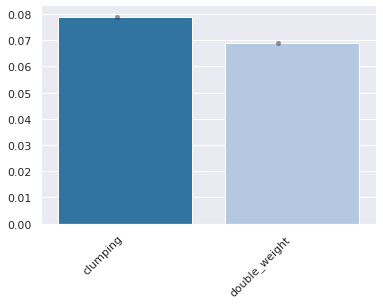

In [18]:
#Visualize UK BioBank R2 outputs
tprs.visualization.visualize_performance(UK_biobank_processor,metric="coef_squared",plot_type="bar_plot",cmap="tab20")

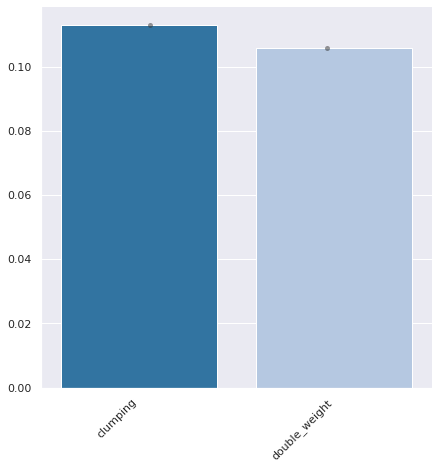

In [19]:
#Visualize Japan BioBank R2 outputs
tprs.visualization.visualize_performance(JPN_biobank_processor,metric="coef_squared",plot_type="bar_plot",cmap="tab20")